In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# definir las variables de rutas de los documentos.

path_1_15_agosto = 'datos-llamadas/Reporte_1_15_agosto.csv'
path_1_15_julio = 'datos-llamadas/Reporte_1_15_julio.csv'
path_16_31_agosto = 'datos-llamadas/Reporte_16_31_agosto.csv'
path_16_31_julio = 'datos-llamadas/Reporte_16_31_julio.csv'

# Concatenar todos los csv en un solo dataframen

In [7]:
# Para esto, primero se leen los archivos csv y se concatenan en un solo dataframe.

df_julio_1 = pd.read_csv(path_1_15_julio, encoding='ISO-8859-1')
df_julio_2 = pd.read_csv(path_16_31_julio, encoding='ISO-8859-1')
df_agosto_1 = pd.read_csv(path_1_15_agosto, encoding='ISO-8859-1')
df_agosto_2 = pd.read_csv(path_16_31_agosto, encoding='ISO-8859-1')

df_completo = pd.concat([df_julio_1, df_julio_2, df_agosto_1, df_agosto_2])

# limpiamos memoria
del df_julio_1, df_julio_2, df_agosto_1, df_agosto_2

df_completo.head(5)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7820\3358292707.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_agosto_1 = pd.read_csv(path_1_15_agosto, encoding='ISO-8859-1')


,Fecha,Fuente,DID,Grupo,Destino,Canal origen,PIN,Canal destino,Estado,Duración,Minutos,Aplicación,ID,Unnamed: 13
0,2025-07-15 19:07:16,2131,3.184967e+09,NaN,3184966691,SIP/2131-000065da,NaN,SIP/Tk_SIP_ITBX-000065db,CONTESTADO,138s (2m 18s),3,NaN,1752624436.26611,NaN
1,2025-07-15 19:03:09,2131,3.017424e+09,NaN,3017424015,SIP/2131-000065d8,NaN,SIP/Tk_SIP_ITBX-000065d9,CONTESTADO,144s (2m 24s),3,NaN,1752624189.26609,NaN
2,2025-07-15 19:02:47,2131,3.017424e+09,NaN,3017424015,SIP/2131-000065d6,NaN,SIP/Tk_SIP_ITBX-000065d7,NO CONTESTADO,0s,0,NaN,---,NaN
3,2025-07-15 19:02:11,2131,3.017424e+09,NaN,3017424015,SIP/2131-000065d4,NaN,SIP/Tk_SIP_ITBX-000065d5,NO CONTESTADO,0s,0,NaN,---,NaN
4,2025-07-15 19:00:19,2131,3.212814e+09,NaN,3212813820,SIP/2131-000065d2,NaN,SIP/Tk_SIP_ITBX-000065d3,CONTESTADO,102s (1m 42s),2,NaN,1752624019.26603,NaN


In [8]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393070 entries, 0 to 87565
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Fecha          393070 non-null  object 
 1   Fuente         393070 non-null  object 
 2   DID            392619 non-null  float64
 3   Grupo          0 non-null       float64
 4   Destino        393070 non-null  int64  
 5   Canal origen   393070 non-null  object 
 6   PIN            0 non-null       float64
 7   Canal destino  393070 non-null  object 
 8   Estado         393070 non-null  object 
 9   Duración       393070 non-null  object 
 10  Minutos        393070 non-null  int64  
 11  Aplicación     0 non-null       float64
 12  ID             393070 non-null  object 
 13  Unnamed: 13    0 non-null       float64
dtypes: float64(5), int64(2), object(7)
memory usage: 45.0+ MB


In [9]:
# eliminar columnas con datos nulos

df_completo = df_completo.drop(columns=["Grupo", "PIN","Aplicación", "Unnamed: 13"])

df_completo.head(5)

,Fecha,Fuente,DID,Destino,Canal origen,Canal destino,Estado,Duración,Minutos,ID
0,2025-07-15 19:07:16,2131,3.184967e+09,3184966691,SIP/2131-000065da,SIP/Tk_SIP_ITBX-000065db,CONTESTADO,138s (2m 18s),3,1752624436.26611
1,2025-07-15 19:03:09,2131,3.017424e+09,3017424015,SIP/2131-000065d8,SIP/Tk_SIP_ITBX-000065d9,CONTESTADO,144s (2m 24s),3,1752624189.26609
2,2025-07-15 19:02:47,2131,3.017424e+09,3017424015,SIP/2131-000065d6,SIP/Tk_SIP_ITBX-000065d7,NO CONTESTADO,0s,0,---
3,2025-07-15 19:02:11,2131,3.017424e+09,3017424015,SIP/2131-000065d4,SIP/Tk_SIP_ITBX-000065d5,NO CONTESTADO,0s,0,---
4,2025-07-15 19:00:19,2131,3.212814e+09,3212813820,SIP/2131-000065d2,SIP/Tk_SIP_ITBX-000065d3,CONTESTADO,102s (1m 42s),2,1752624019.26603


In [10]:
# verificar datos duplicados

df_completo.duplicated().sum()

np.int64(0)

In [11]:
# eliminar columnas que el experto dice que se pueden omitir y no aporta al problema en estudio
# Alex dice que columanas DID, Destino,Canal origen, Canal destino, Duración, ID son desechables.
# Para utilizamos la funcion drop() nuevamente.

df_completo = df_completo.drop(columns=["DID", "Destino", "Canal origen", "Canal destino", "Duración","ID"])

df_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393070 entries, 0 to 87565
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Fecha    393070 non-null  object
 1   Fuente   393070 non-null  object
 2   Estado   393070 non-null  object
 3   Minutos  393070 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 15.0+ MB


# Reporte de minutos por estado de llamada contestado

In [12]:
llamadas_contestadas = df_completo['Estado'].value_counts()
llamadas_contestadas

Estado
NO CONTESTADO    205899
CONTESTADO       178242
OCUPADO            5416
FALLIDO            3513
Name: count, dtype: int64

In [19]:
llamadas_contestadas.to_excel('reportes/llamadas_contestadas.xlsx')

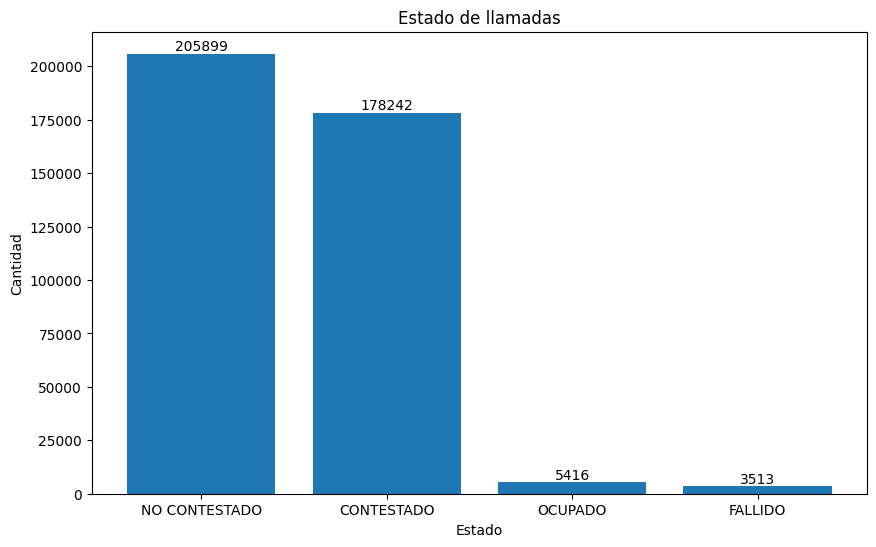

In [17]:
# Geenrar grafico de barras con matplotlib con las cantidades de frecuencia en cada estado
plt.figure(figsize=(10, 6))
bars = plt.bar(llamadas_contestadas.index, llamadas_contestadas.values)
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.title('Estado de llamadas')

for bar in bars:
    yval = bar.get_height()  # Obtiene la altura de la barra (el valor)
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, yval, ha='center', va='bottom')
# guardar el grafico en un archivo png
plt.savefig('reportes/estado_llamadas.png')
plt.show()

In [ ]:
# calcular total minutos en llamadas contestadas
df_contestadas = df_completo[df_completo['Estado'] == 'CONTESTADO']
time_llamadas_contestadas = df_contestadas['Minutos'].sum()

print(f"Total minutos en llamadas contestadas: {time_llamadas_contestadas}")

Total minutos en llamadas contestadas: 386279


# Analisis llamadas y minutos por agente

In [24]:
estado_llamadas_agente = df_completo['Fuente'].value_counts()
estado_llamadas_agente.to_excel('reportes/estado_llamadas_agente.xlsx')

In [25]:
cantidad_agentes = estado_llamadas_agente.count()

print(f"Cantidad de agentes: {cantidad_agentes}")

Cantidad de agentes: 384


In [26]:
# Calcular los minutos por categora encontrada en llamadas_agentes y relacionarlo a el total de munitos gastados.

datos_resporte = {'agente':[],
                  'llamadas': [],
                  'minutos_totales': []
                  }

for code, cantidad_llamadas_agente in estado_llamadas_agente.items():
    df_minutos_agente = df_completo[df_completo['Estado'] == 'CONTESTADO'] 
    df_minutos_agente = df_minutos_agente[df_minutos_agente['Fuente'] == code]
    time_agente = df_minutos_agente['Minutos'].sum()

    datos_resporte['agente'].append(code)
    datos_resporte['llamadas'].append(cantidad_llamadas_agente)
    datos_resporte['minutos_totales'].append(time_agente)  

df_reporte_agentes =  pd.DataFrame(datos_resporte)
df_reporte_agentes.to_excel("reportes/reporte_agentes.xlsx", index=False) 

# Como tenemos la columna fecha podemos hacer un analisis de series de tiempo

Esto es posible ya que la columna fecha tiene un comportamiento que pandas lo puede utilizar como base para tranformar automaticamente a tipod e dato de tiempo

In [27]:
# convertimos la columna fecha a datetime
df_completo['Fecha'] = pd.to_datetime(df_completo['Fecha'])
# verificamos el tipo de datos de la columna fecha
df_completo['Fecha'].dtype
# verificamos los datos de la columna fecha
df_completo['Fecha'].head()
# verificamos los datos de la columna fecha
df_completo['Fecha'].tail()


87561   2025-08-16 07:59:20
87562   2025-08-16 07:58:58
87563   2025-08-16 07:58:47
87564   2025-08-16 07:57:12
87565   2025-08-16 07:50:24
Name: Fecha, dtype: datetime64[ns]

In [28]:
# para el analisis de series de tiempo es neecsario ordenar los datos por fecha
df_completo = df_completo.sort_values(by='Fecha')
df_completo.head(3)


,Fecha,Fuente,Estado,Minutos
117924,2025-07-01 07:09:41,2301,NO CONTESTADO,0
117923,2025-07-01 07:09:59,2618,CONTESTADO,1
117922,2025-07-01 07:10:50,2301,NO CONTESTADO,0


In [29]:
# Con esto analisamos mediante graficos de linea se puede graficr valores numeros como 
# cantidad de llamadas por un rango de tiempo o minutos totales por rango de tiempo
# los rangos pueden ser desde el menor perior en este caso desde seguntos hasta el mayo que sera años
# pero no aportaria infromacion de valor asi que analisamos por mes, y dias

# Para esto agregamos columnas de mes y dia 

# Crea una nueva columna que contenga solo el mes y el año de la fecha
df_completo['mes_año'] = df_completo['Fecha'].dt.to_period('M')

# Creamos una nueva columna que contenga solo la fecha (día, mes, año)
df_completo['dia'] = df_completo['Fecha'].dt.date

df_completo.head(3)


,Fecha,Fuente,Estado,Minutos,mes_año,dia
117924,2025-07-01 07:09:41,2301,NO CONTESTADO,0,2025-07,2025-07-01
117923,2025-07-01 07:09:59,2618,CONTESTADO,1,2025-07,2025-07-01
117922,2025-07-01 07:10:50,2301,NO CONTESTADO,0,2025-07,2025-07-01


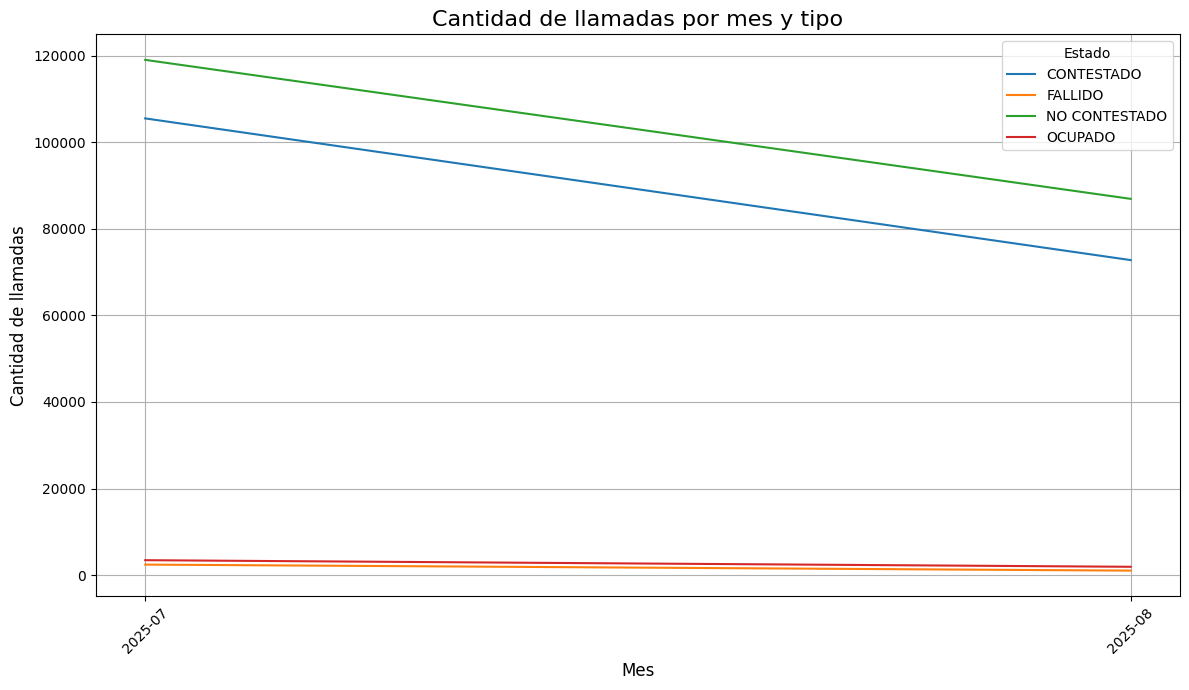

In [36]:
# graficar estados por año
# Agrupa los datos y cuenta el número de llamadas por estado y por mes
llamadas_por_mes = df_completo.groupby(['mes_año', 'Estado']).size().unstack(fill_value=0)

# --- Paso 3: Graficar las líneas ---
plt.figure(figsize=(12, 7))

# Dibuja una línea para cada 'Estado'
for column in llamadas_por_mes.columns:
    plt.plot(llamadas_por_mes.index.astype(str), llamadas_por_mes[column], label=column)

# --- Configurar el gráfico ---
plt.title('Cantidad de llamadas por mes y tipo', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de llamadas', fontsize=12)
plt.xticks(rotation=45) # Rota las etiquetas del eje X para que sean legibles
plt.legend(title='Estado') # Muestra la leyenda con los estados de llamada
plt.grid(True) # Añade una cuadrícula para facilitar la lectura
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se corten

plt.savefig('reportes/llamadas_por_mes.png')
# Mostrar el gráfico
plt.show()

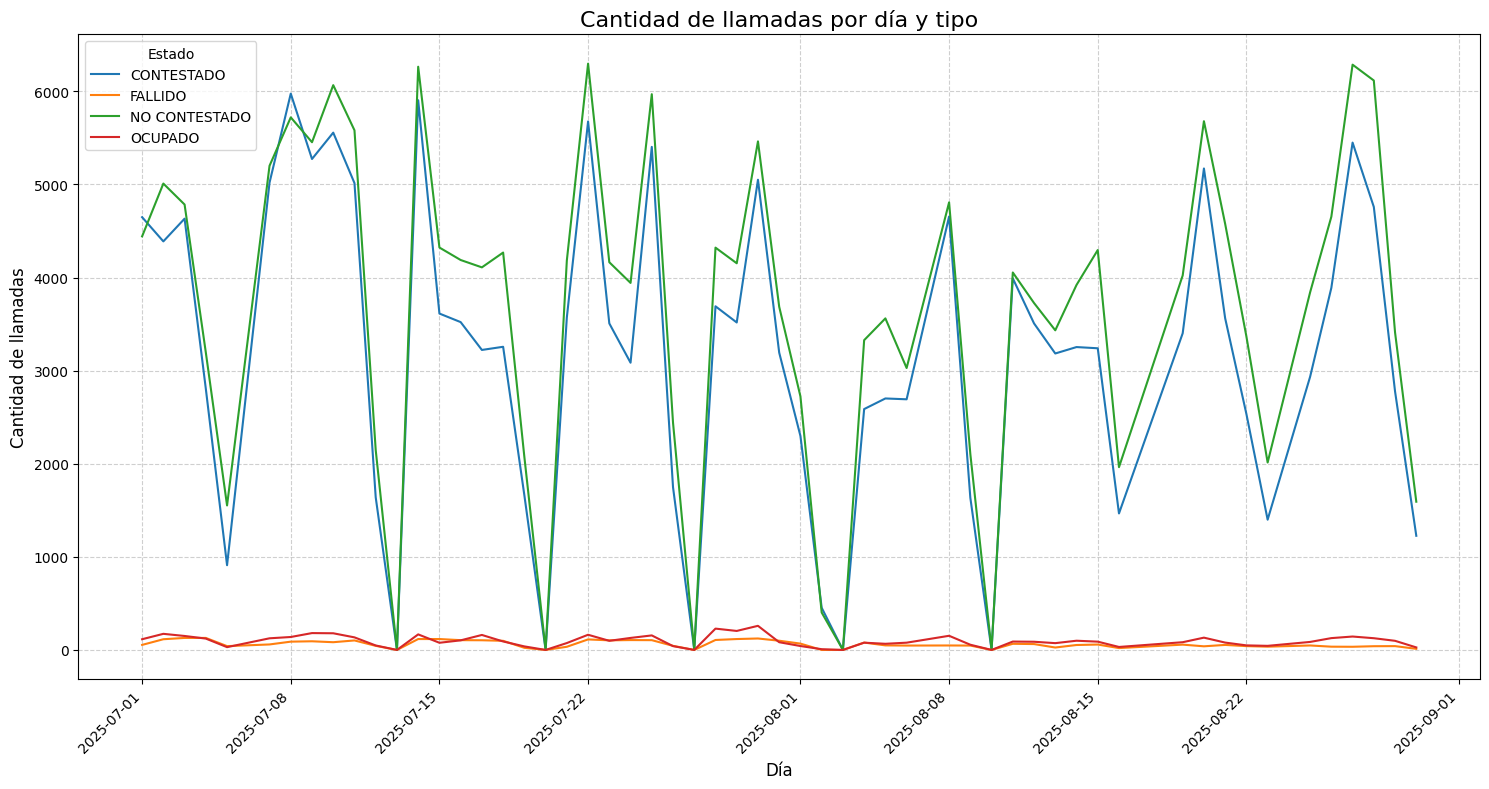

In [37]:
# graficamos comportamiento de estado por dias 

# Agrupamos por 'dia' y 'Estado', y contamos la cantidad de llamadas
llamadas_por_dia = df_completo.groupby(['dia', 'Estado']).size().unstack(fill_value=0)

# --- Paso 3: Graficar las líneas ---
plt.figure(figsize=(15, 8))

# Dibuja una línea para cada 'Estado'
for column in llamadas_por_dia.columns:
    plt.plot(llamadas_por_dia.index, llamadas_por_dia[column], label=column)

# --- Configurar el gráfico ---
plt.title('Cantidad de llamadas por día y tipo', fontsize=16)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Cantidad de llamadas', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota y alinea las etiquetas del eje X para que no se superpongan
plt.legend(title='Estado')
plt.grid(True, linestyle='--', alpha=0.6) # Añade una cuadrícula punteada
plt.tight_layout() # Asegura que las etiquetas no se salgan del gráfico

plt.savefig('reportes/llamadas_por_dia.png')
# Mostrar el gráfico
plt.show()

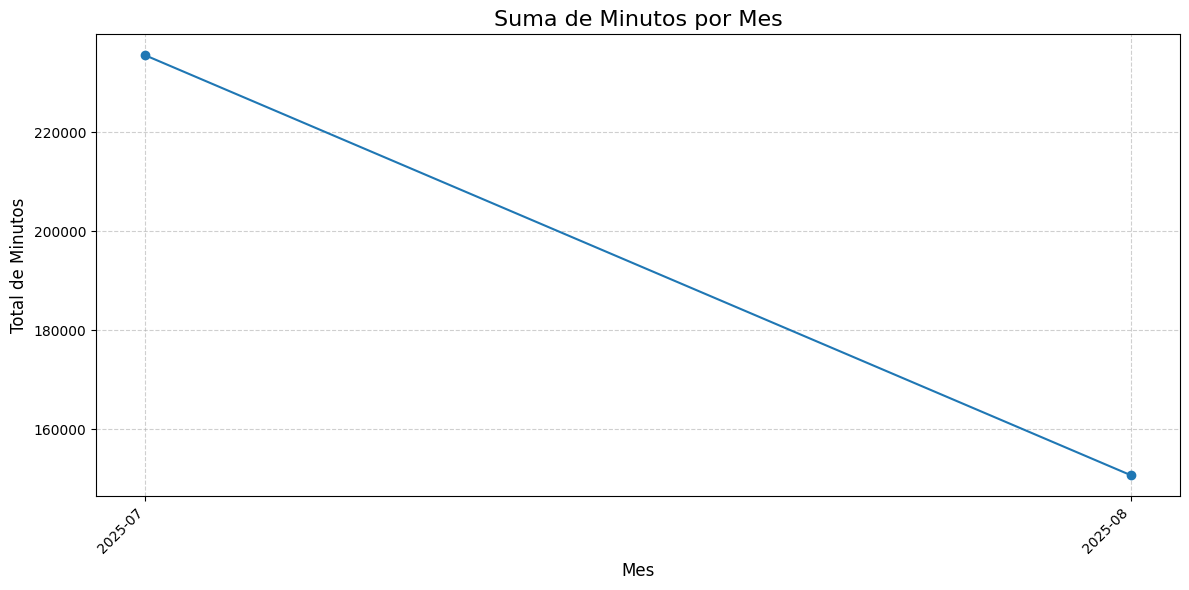

In [38]:
# ahora generamos graficos de lienas pero en los valors de total de minutos 

# Agrupar por mes y sumar la columna 'Minutos'
minutos_por_mes = df_completo.groupby('mes_año')['Minutos'].sum()

plt.figure(figsize=(12, 6))

# Dibujar la línea de la suma de minutos
plt.plot(minutos_por_mes.index.astype(str), minutos_por_mes.values, marker='o', linestyle='-')

# Configurar el gráfico
plt.title('Suma de Minutos por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Total de Minutos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('reportes/total_minutos_por_mes.png')
# Mostrar el gráfico
plt.show()

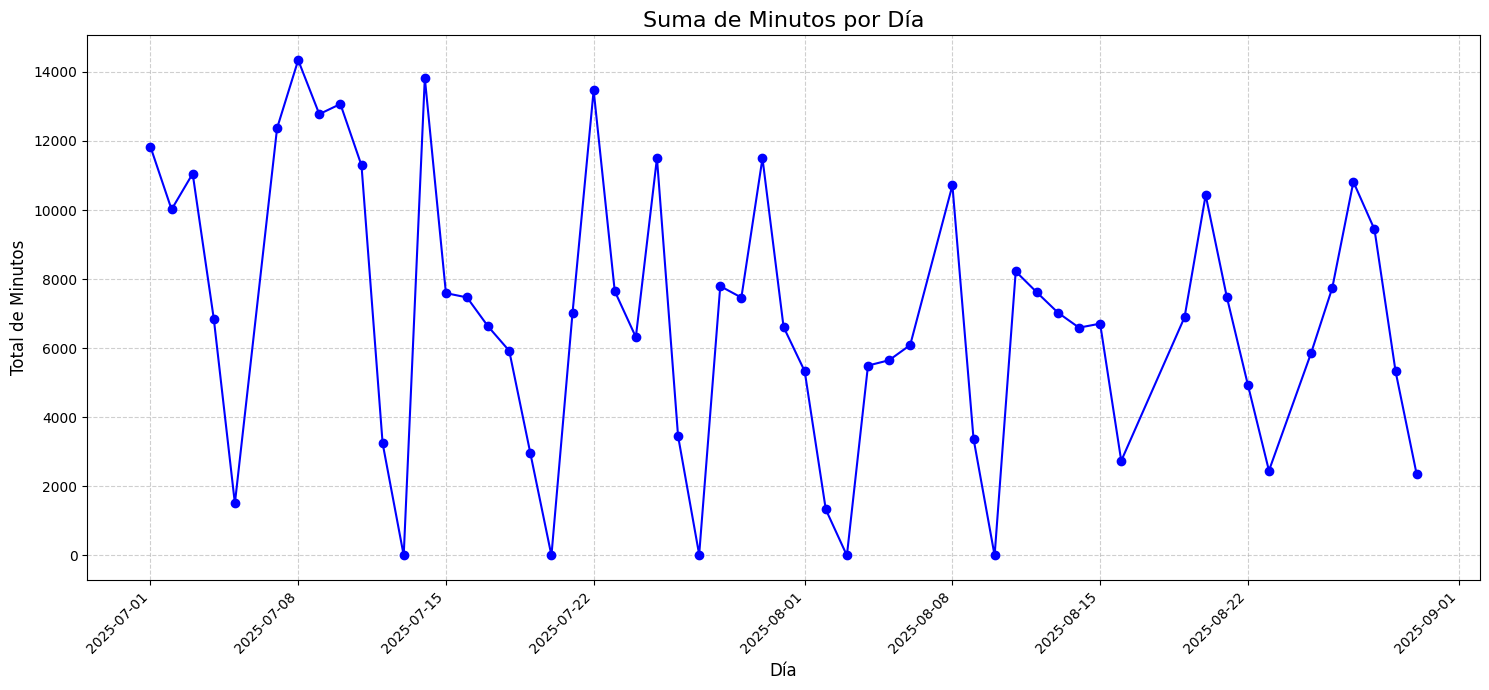

In [39]:
#grafico de minutos por dias
# Agrupar por día y sumar la columna 'Minutos'
minutos_por_dia = df_completo.groupby('dia')['Minutos'].sum()

# --- 2. Graficar la serie de tiempo ---
plt.figure(figsize=(15, 7))

# Dibujar la línea de la suma de minutos
plt.plot(minutos_por_dia.index, minutos_por_dia.values, marker='o', linestyle='-', color='b')

# Configurar el gráfico
plt.title('Suma de Minutos por Día', fontsize=16)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Total de Minutos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('reportes/total_minutos_por_dia.png')
# Mostrar el gráfico
plt.show()

# Por ultimo podemos guardar el df_completo en un dcoumento excel para guardr los tratamiento echos

In [34]:
df_completo.to_excel('datos_unidos_procesado_julio_agosto.xlsx')

In [35]:
df_completo.to_csv('datos_unidos_procesado_julio_agosto.csv')